In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

%matplotlib inline

In [4]:
# The paths:
relation_path = '/Users/aaronwang/PycharmProjects/LLMs_n_KGs_for_Education/data/DBE-KT22/2_DBE_KT22_datafiles_100102_csv/KC_Relationships.csv'
kc_path = '/Users/aaronwang/PycharmProjects/LLMs_n_KGs_for_Education/data/DBE-KT22/2_DBE_KT22_datafiles_100102_csv/KCs.csv'

In [7]:
from IPython.display import display

In [8]:
# load two csv:

df_relation = pd.read_csv(relation_path)
print("Relationships between KCs: ")
display(df_relation)

df_kc = pd.read_csv(kc_path)
print("KC: ")
display(df_kc)

Relationships between KCs: 


,id,from_knowledgecomponent_id,to_knowledgecomponent_id
0,595,54,53
1,596,53,54
2,397,53,56
3,398,53,48
4,501,59,57
...,...,...,...
197,581,9,4
198,582,10,4
199,583,11,4
200,585,13,4


KC: 


,id,name,description
0,56,Data Model,Data Models are fundamental entities to introd...
1,12,Subset,"If A and B are two sets, and every element of ..."
2,24,CREATE TABLE,The CREATE TABLE statement is used to create a...
3,33,Join,When we want to retrieve data from more than o...
4,14,Relational data model,The relational model represents the database a...
...,...,...,...
93,58,Participation constraints,Specifies whether the existence of any entity ...
94,88,Role-Based Access Control (RBAC),"Access rights are grouped by roles, and the us..."
95,78,Selection,Select operation chooses the subset of tuples ...
96,21,SQL,SQL stands for Structured Query Language. It ...


In [9]:
# Create the KG based on KC
G_KC = nx.DiGraph()

# Add edges to the graph
for _, row in df_relation.iterrows():
    G_KC.add_edge(row['from_knowledgecomponent_id'], row['to_knowledgecomponent_id'])


# Add node features
for node in G_KC.nodes():
    # Find the row in df_nodes that matches the node id
    node_data = df_kc[df_kc['id'] == node].iloc[0]
    # Update the node with features from the matching row
    nx.set_node_attributes(G_KC, {node: {'id': node_data['id'], 
                                      'name': node_data['name'], 
                                      'description': node_data['description']}})

In [10]:
print("Number of nodes:", G_KC.number_of_nodes())
print("Number of edges:", G_KC.number_of_edges())

print("Is the graph directed?", G_KC.is_directed())

# For all nodes
degrees = dict(G_KC.degree())
print("Degrees:", degrees)

# For directed graphs, in-degree and out-degree
if G_KC.is_directed():
    in_degrees = dict(G_KC.in_degree())
    out_degrees = dict(G_KC.out_degree())
    print("In-degrees:", in_degrees)
    print("Out-degrees:", out_degrees)


# For undirected graphs
if not G_KC.is_directed():
    connected_components = list(nx.connected_components(G_KC))
    print("Connected components:", connected_components)

# For directed graphs
if G_KC.is_directed():
    strongly_connected = list(nx.strongly_connected_components(G_KC))
    weakly_connected = list(nx.weakly_connected_components(G_KC))
    print("Strongly connected components:", strongly_connected)
    print("Weakly connected components:", weakly_connected)

Number of nodes: 98
Number of edges: 202
Is the graph directed? True
Degrees: {54: 2, 53: 10, 56: 8, 48: 4, 59: 2, 57: 10, 96: 2, 94: 6, 15: 2, 14: 16, 26: 2, 22: 8, 89: 4, 81: 14, 20: 2, 40: 2, 32: 10, 64: 10, 67: 2, 68: 2, 69: 2, 99: 2, 95: 8, 42: 2, 33: 8, 102: 2, 93: 10, 91: 8, 97: 2, 92: 4, 98: 2, 55: 2, 80: 8, 85: 2, 50: 6, 88: 4, 103: 2, 19: 4, 21: 8, 27: 4, 28: 10, 34: 4, 23: 2, 35: 2, 29: 2, 30: 2, 31: 2, 101: 2, 52: 8, 77: 2, 76: 6, 45: 8, 51: 2, 84: 2, 12: 2, 4: 18, 90: 2, 82: 10, 100: 2, 71: 8, 72: 2, 73: 2, 74: 2, 75: 2, 44: 2, 16: 6, 70: 2, 58: 8, 49: 2, 83: 2, 36: 8, 37: 2, 38: 2, 39: 2, 47: 4, 63: 2, 86: 4, 87: 4, 41: 2, 60: 2, 66: 2, 24: 2, 46: 2, 25: 2, 43: 2, 65: 2, 79: 2, 18: 4, 61: 2, 78: 2, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 13: 2, 17: 2}
In-degrees: {54: 1, 53: 5, 56: 4, 48: 2, 59: 1, 57: 5, 96: 1, 94: 3, 15: 1, 14: 8, 26: 1, 22: 4, 89: 2, 81: 7, 20: 1, 40: 1, 32: 5, 64: 5, 67: 1, 68: 1, 69: 1, 99: 1, 95: 4, 42: 1, 33: 4, 102: 1, 93: 5, 91: 4, 97: 1, 92: 2, 98

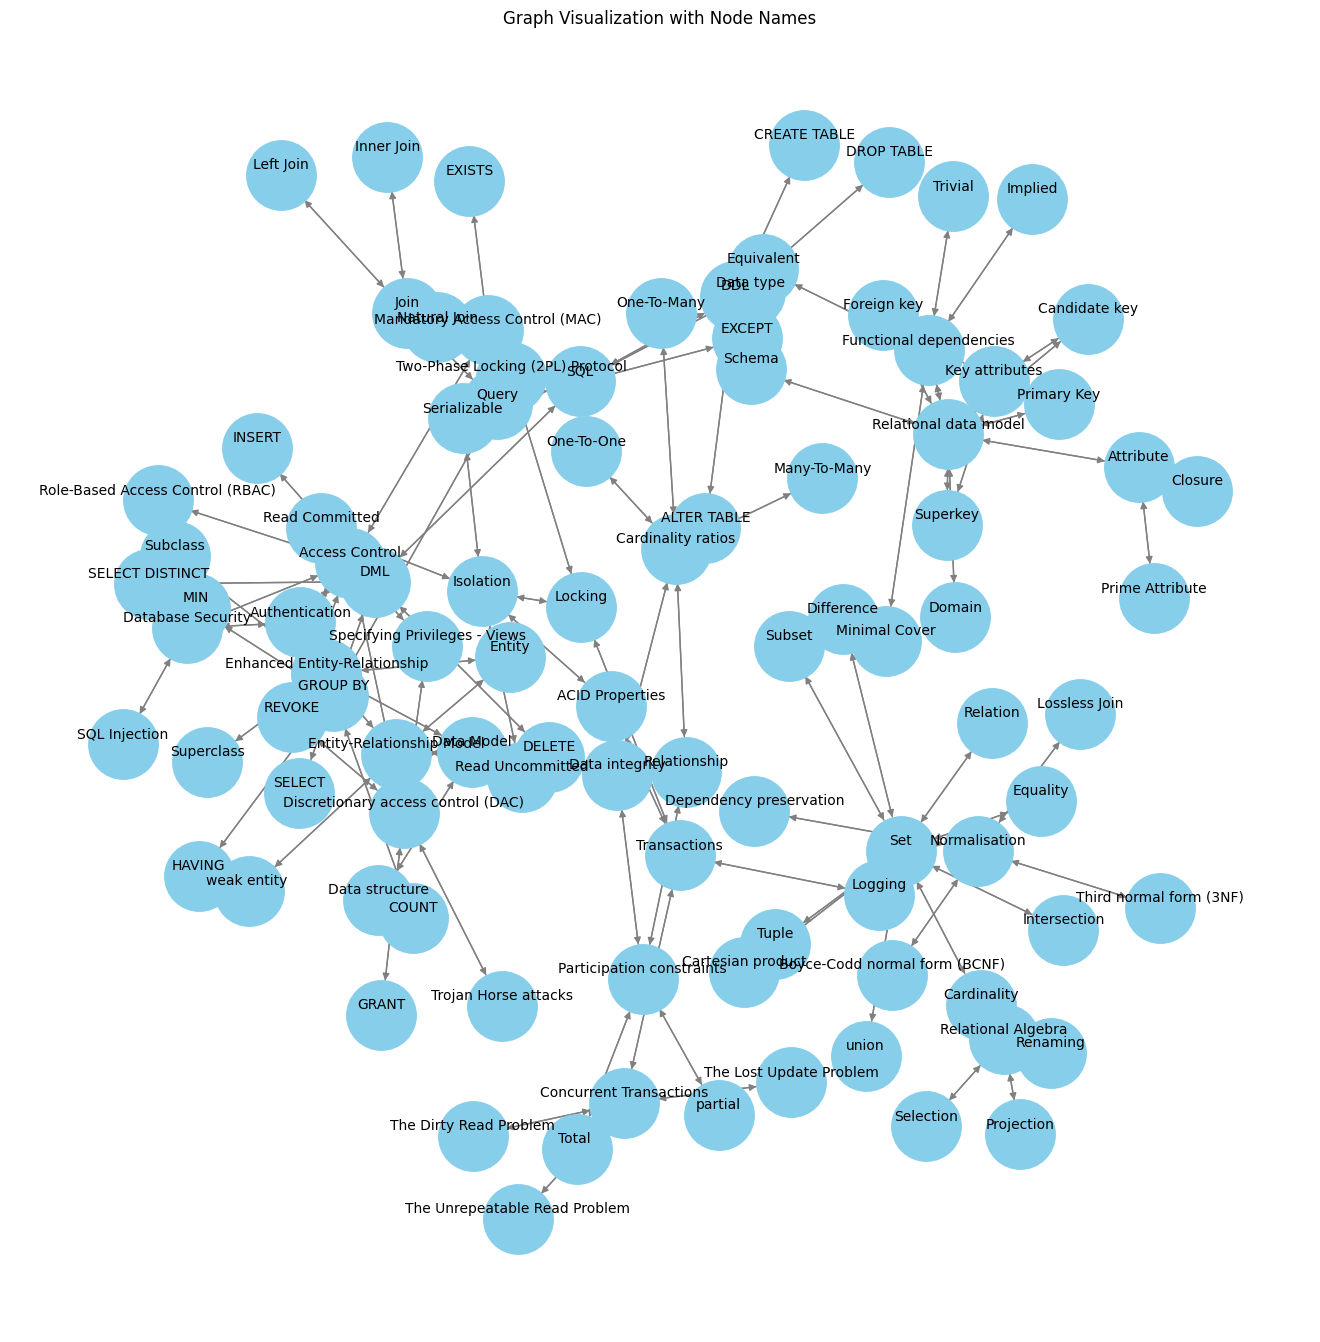

In [23]:
# Assuming G_KC is your directed graph with node attributes
# (including 'name' as one of the attributes for each node)

plt.figure(figsize=(13, 13))
# Position nodes using one of the layout algorithms
pos = nx.spring_layout(G_KC, k=0.35, iterations=50)

# Draw the graph
nx.draw(G_KC, pos, with_labels=False, node_color='skyblue', node_size=2500, edge_color='gray', arrows=True)

# Draw the node names as labels above the nodes
for node, (x, y) in pos.items():
    plt.text(x, y+0.01, s=G_KC.nodes[node]['name'], horizontalalignment='center', fontsize=10)

plt.title('Graph Visualization with Node Names')
plt.show()

Well. Bidirectional edges are every where. Now try to remove them.

In [21]:
G_KC_d = nx.DiGraph()

# Add edges to the graph, making sure to ignore reversed duplicates
seen_edges = set()
for _, row in df_relation.iterrows():
    edge = (row['from_knowledgecomponent_id'], row['to_knowledgecomponent_id'])
    reversed_edge = (row['to_knowledgecomponent_id'], row['from_knowledgecomponent_id'])
    
    # Check if the reversed edge has already been seen
    if reversed_edge not in seen_edges:
        G_KC_d.add_edge(*edge)
        seen_edges.add(edge)

# Add node attributes from the second CSV
for _, row in df_kc.iterrows():
    node_id = row['id']
    if node_id in G_KC_d:
        # Assuming 'name' and 'description' are column names in your CSV
        G_KC_d.nodes[node_id]['name'] = row['name']
        G_KC_d.nodes[node_id]['description'] = row['description']

# Now, G_KC_d is a directed graph with the specified edges and node attributes

In [22]:
print("Number of nodes:", G_KC_d.number_of_nodes())
print("Number of edges:", G_KC_d.number_of_edges())

print("Is the graph directed?", G_KC_d.is_directed())

# For all nodes
degrees = dict(G_KC_d.degree())
print("Degrees:", degrees)

# For directed graphs, in-degree and out-degree
if G_KC_d.is_directed():
    in_degrees = dict(G_KC_d.in_degree())
    out_degrees = dict(G_KC_d.out_degree())
    print("In-degrees:", in_degrees)
    print("Out-degrees:", out_degrees)


# For undirected graphs
if not G_KC_d.is_directed():
    connected_components = list(nx.connected_components(G_KC_d))
    print("Connected components:", connected_components)

# For directed graphs
if G_KC_d.is_directed():
    strongly_connected = list(nx.strongly_connected_components(G_KC_d))
    weakly_connected = list(nx.weakly_connected_components(G_KC_d))
    print("Strongly connected components:", strongly_connected)
    print("Number of strongly connected components: ", len(strongly_connected))
    print("Weakly connected components:", weakly_connected)
    print("Number of weakly connected components: ", len(weakly_connected))

Number of nodes: 98
Number of edges: 101
Is the graph directed? True
Degrees: {54: 1, 53: 5, 56: 4, 48: 2, 59: 1, 57: 5, 96: 1, 94: 3, 15: 1, 14: 8, 26: 1, 22: 4, 89: 2, 81: 7, 20: 1, 40: 1, 32: 5, 64: 5, 67: 1, 68: 1, 69: 1, 99: 1, 95: 4, 42: 1, 33: 4, 102: 1, 93: 5, 91: 4, 97: 1, 92: 2, 98: 1, 55: 1, 80: 4, 85: 1, 50: 3, 88: 2, 103: 1, 19: 2, 21: 4, 27: 2, 28: 5, 34: 2, 23: 1, 35: 1, 29: 1, 30: 1, 31: 1, 101: 1, 52: 4, 77: 1, 76: 3, 45: 4, 51: 1, 84: 1, 12: 1, 4: 9, 90: 1, 82: 5, 100: 1, 71: 4, 72: 1, 73: 1, 74: 1, 75: 1, 44: 1, 16: 3, 70: 1, 58: 4, 49: 1, 83: 1, 36: 4, 37: 1, 38: 1, 39: 1, 47: 2, 63: 1, 86: 2, 87: 2, 41: 1, 60: 1, 66: 1, 24: 1, 46: 1, 25: 1, 43: 1, 65: 1, 79: 1, 18: 2, 61: 1, 78: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 13: 1, 17: 1}
In-degrees: {54: 0, 53: 3, 56: 3, 48: 2, 59: 0, 57: 3, 96: 0, 94: 2, 15: 0, 14: 8, 26: 0, 22: 4, 89: 1, 81: 5, 20: 0, 40: 0, 32: 5, 64: 1, 67: 1, 68: 1, 69: 1, 99: 0, 95: 4, 42: 0, 33: 2, 102: 0, 93: 3, 91: 0, 97: 1, 92: 2, 98: 0, 55: 0

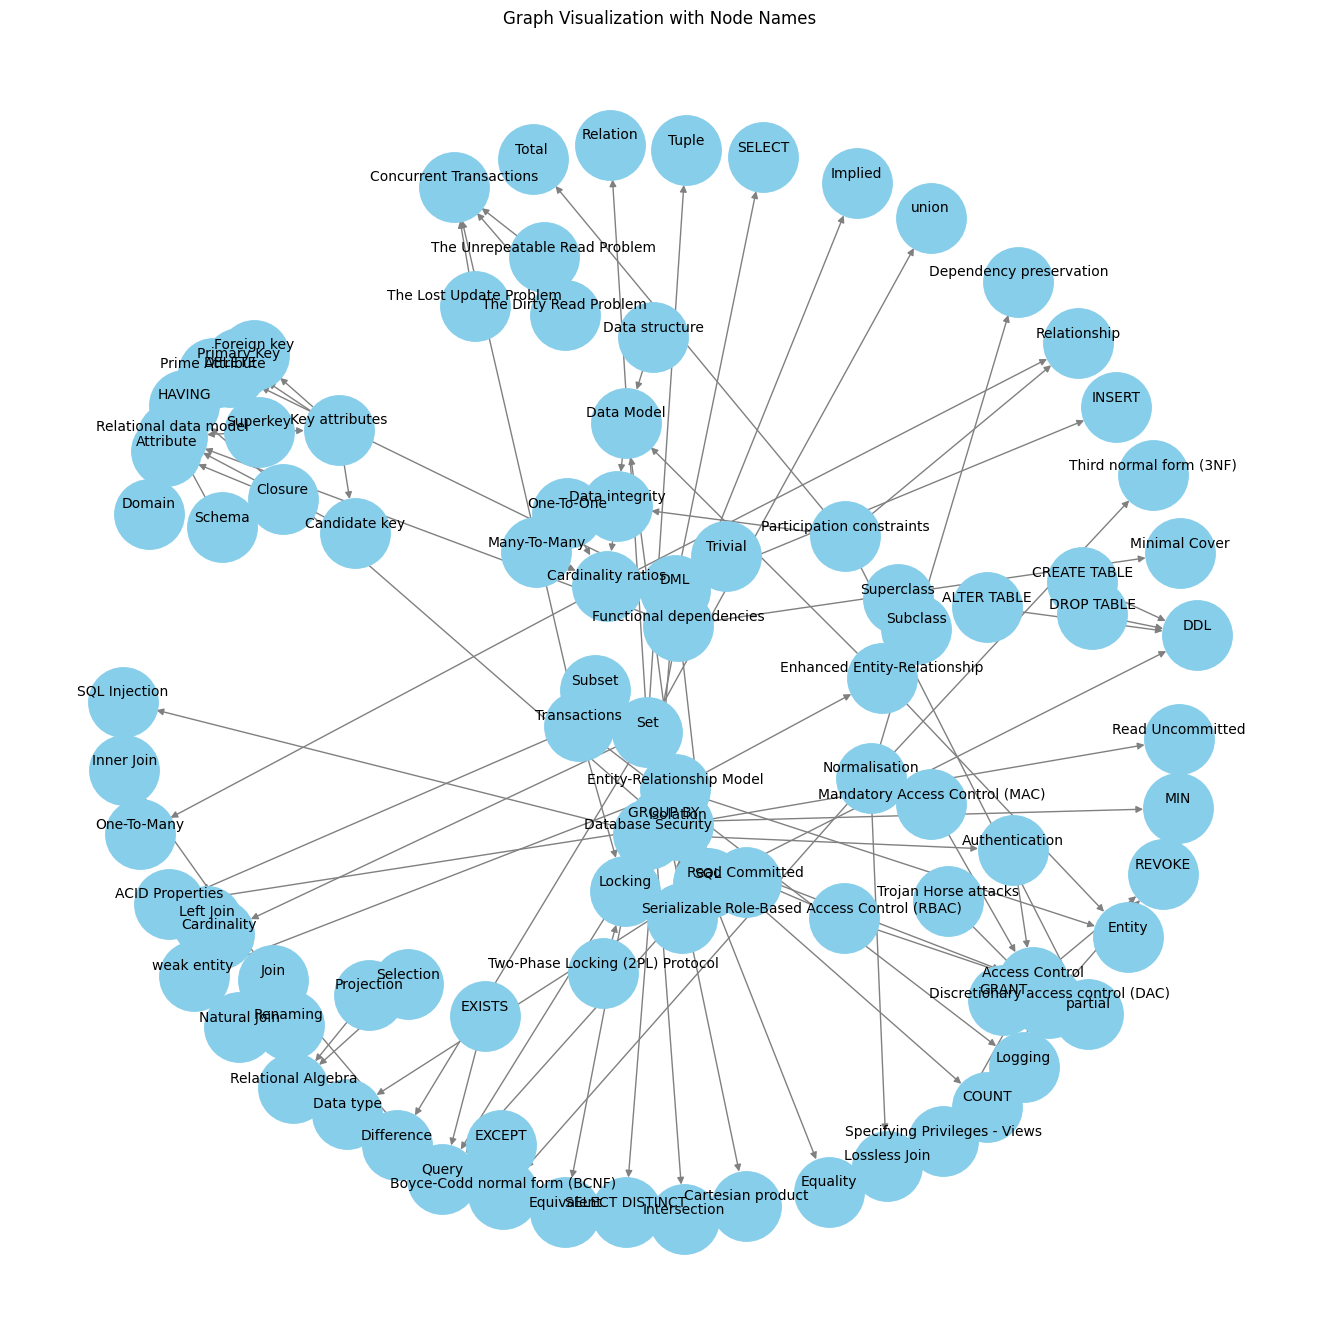

In [33]:
# (including 'name' as one of the attributes for each node)

plt.figure(figsize=(13, 13))
# Position nodes using one of the layout algorithms
pos = nx.spring_layout(G_KC_d, k=2, iterations=500)

# Draw the graph
nx.draw(G_KC_d, pos, with_labels=False, node_color='skyblue', node_size=2500, edge_color='gray', arrows=True)

# Draw the node names as labels above the nodes
for node, (x, y) in pos.items():
    plt.text(x, y+0.01, s=G_KC_d.nodes[node]['name'], horizontalalignment='center', fontsize=10)

plt.title('Graph Visualization with Node Names')
plt.show()

In [34]:
# Store it:
file_name = 'DBE-KT22.graphml'

nx.write_graphml(G_KC_d, file_name)